In [ ]:
%matplotlib inline
from pylab import *
from sci378 import *
from lmfit import *

Version:  0.0.38


## Peak Fitting

In [ ]:
data=pd.read_csv('data/peaks/sample0.csv')
data

,t,y
0,0.203317,4800.0
1,0.206650,5017.0
2,0.209983,5202.0
3,0.213317,5361.0
4,0.216650,5520.0
...,...,...
535,1.986650,21393.0
536,1.989983,21369.0
537,1.993317,21343.0
538,1.996650,21340.0


[<matplotlib.lines.Line2D>]

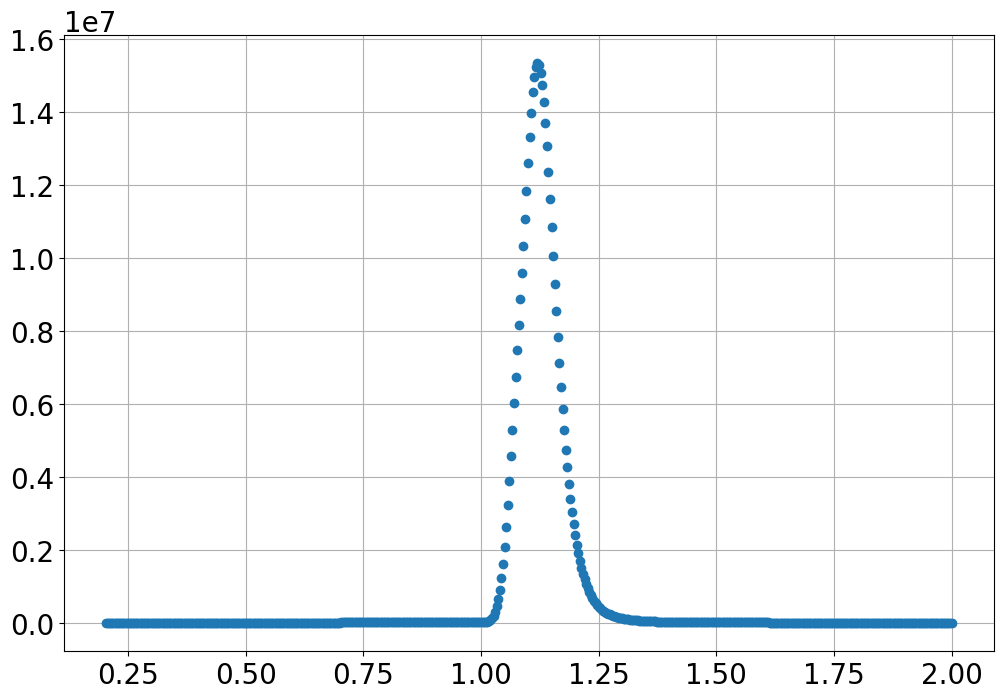

In [ ]:
t=array(data['t'])
y=array(data['y'])
plot(t,y,'o')

In [ ]:
model=models.GaussianModel()
model.param_names

['amplitude', 'center', 'sigma']

In [ ]:
results=model.fit(y,x=t,
                 amplitude=1e7,
                 center=1,
                 sigma=0.1)
results

(0.9, 1.3)

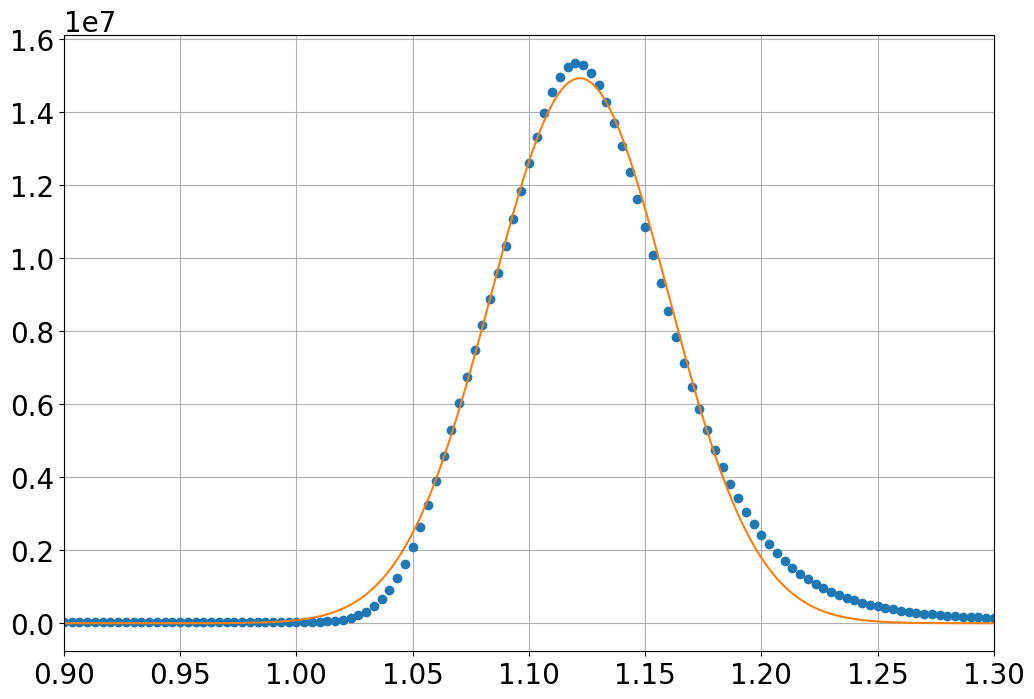

In [ ]:
xx=linspace(0,2,1000)
yy=results.eval(x=xx)
plot(t,y,'o')
plot(xx,yy,'-')
xlim([.9,1.3])

In [ ]:
def fit_peak(filename):
    data=pd.read_csv(filename)
    t=array(data['t'])
    y=array(data['y'])
    
    model=models.GaussianModel()
    params=model.make_params()
    
    
    
    
    params['amplitude']=Parameter("amplitude",
                                 min=0,
                                 value=max(y))
    
    results=model.fit(y,params,x=t,center=1,sigma=1)

    return t,y,results

def fit_peak_take2(filename):
    data=pd.read_csv(filename)
    t=array(data['t'])
    y=array(data['y'])
    
    model=models.GaussianModel() + models.LinearModel()
    params=model.make_params()
    
    
    params['amplitude']=Parameter("amplitude",
                                 min=0,
                                 value=max(y))

    params['offset']=Parameter("offset",
                                 value=(y[-1]+y[0])/2)
    params['slope']=Parameter("slope",
                                 value=(y[-1]-y[0])/(t[-1]-t[0]))
    
    
    results=model.fit(y,params,x=t,center=1,sigma=1)

    return t,y,results



(0.9, 1.3)

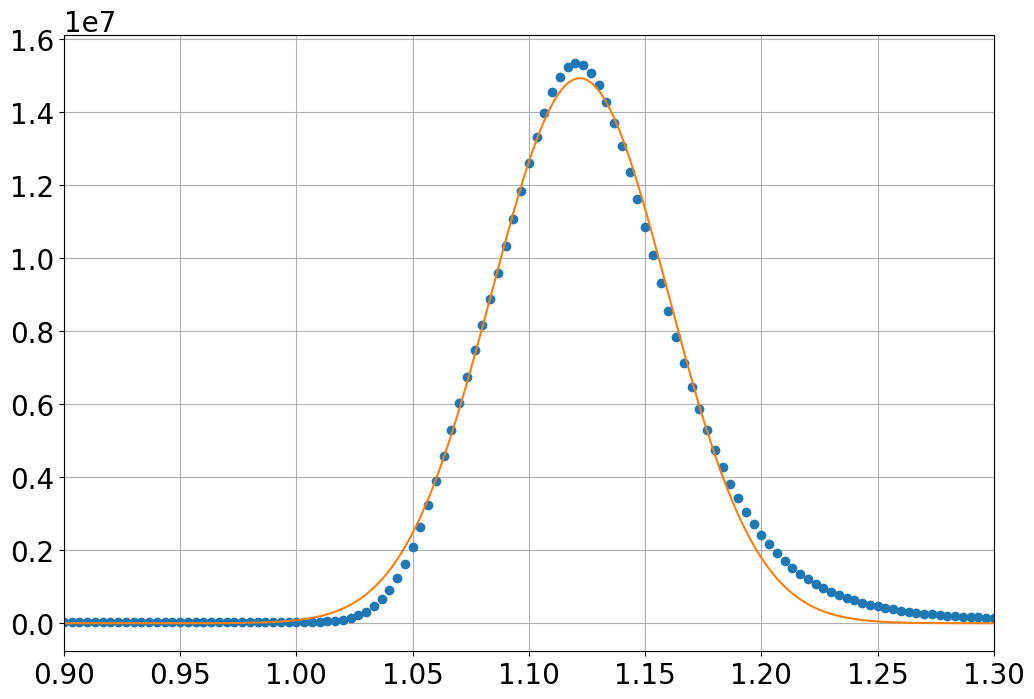

In [ ]:
t,y,results=fit_peak('data/peaks/sample0.csv')
xx=linspace(0,2,1000)
yy=results.eval(x=xx)
plot(t,y,'o')
plot(xx,yy,'-')
xlim([.9,1.3])

(0.9, 1.3)

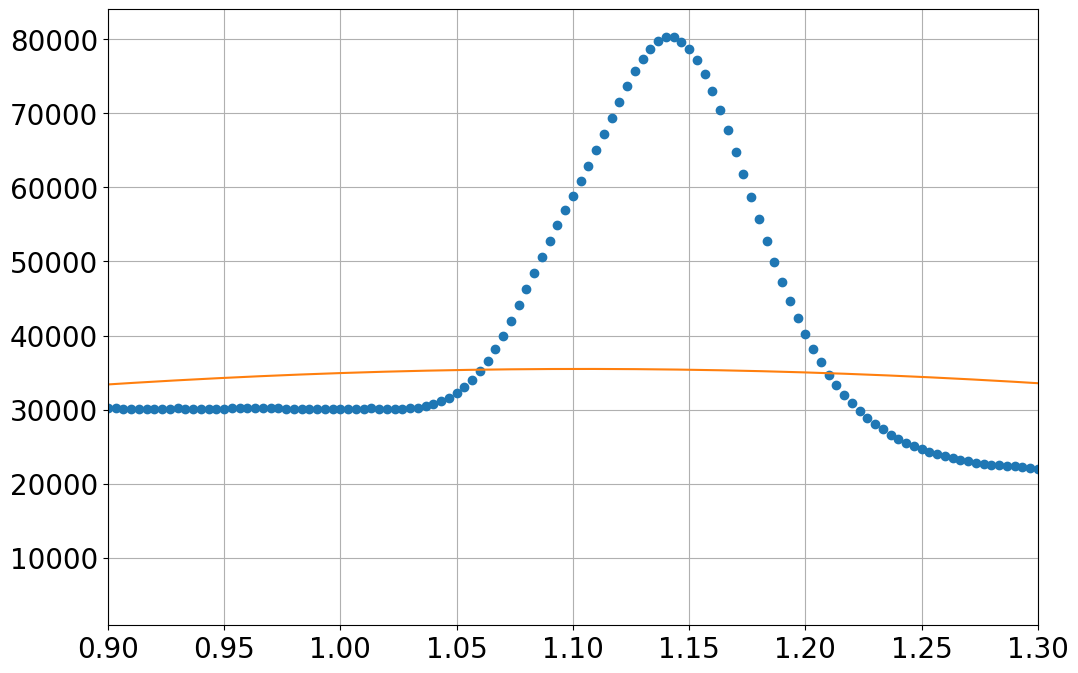

In [ ]:
t,y,results=fit_peak('data/peaks/sample90.csv')
xx=linspace(0,2,1000)
yy=results.eval(x=xx)
plot(t,y,'o')
plot(xx,yy,'-')
xlim([.9,1.3])

(0.9, 1.3)

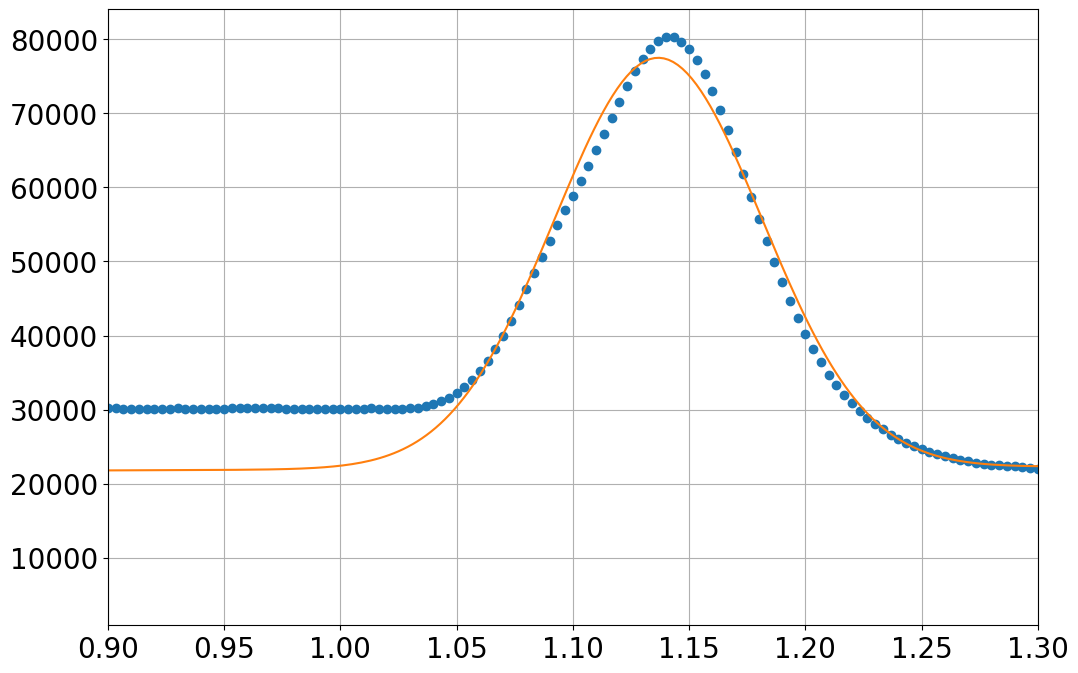

In [ ]:
t,y,results=fit_peak_take2('data/peaks/sample90.csv')
xx=linspace(0,2,1000)
yy=results.eval(x=xx)
plot(t,y,'o')
plot(xx,yy,'-')
xlim([.9,1.3])

In [ ]:
from glob import glob

In [ ]:
filenames=glob('data/peaks/sample*.csv')
len(filenames)

423

In [ ]:
filenames[:5]

['data/peaks/sample170.csv',
 'data/peaks/sample164.csv',
 'data/peaks/sample47.csv',
 'data/peaks/sample53.csv',
 'data/peaks/sample158.csv']

In [ ]:
filenames[6]

'data/peaks/sample90.csv'

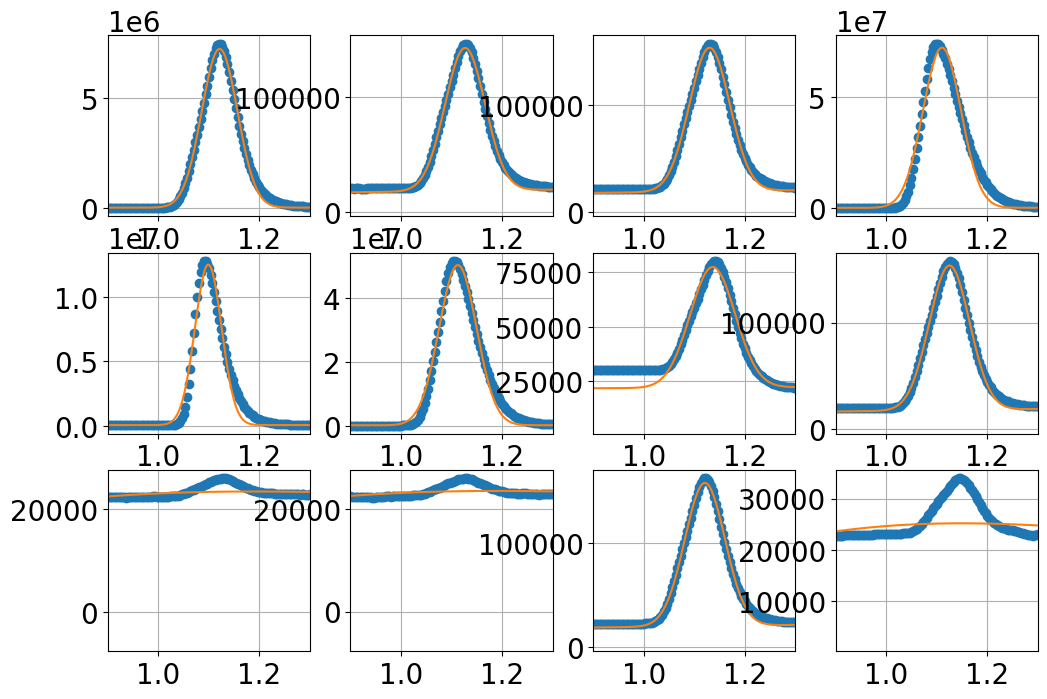

In [ ]:
count=1
for name in filenames[:12]:
    subplot(3,4,count)
    t,y,results=fit_peak_take2(name)
    xx=linspace(0,2,1000)
    yy=results.eval(x=xx)
    plot(t,y,'o')
    plot(xx,yy,'-')
    xlim([.9,1.3])
    
    count=count+1

[<matplotlib.lines.Line2D>]

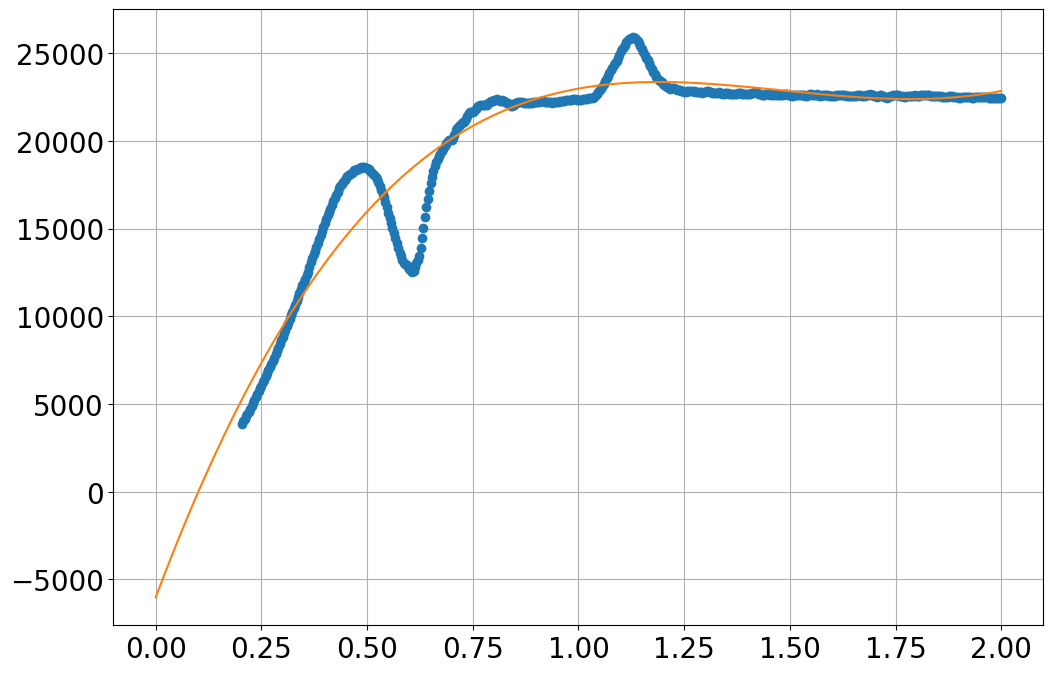

In [ ]:
t,y,results=fit_peak_take2('data/peaks/sample372.csv')
xx=linspace(0,2,1000)
yy=results.eval(x=xx)
plot(t,y,'o')
plot(xx,yy,'-')
#xlim([.9,1.3])

In [ ]:
filenames[8]

'data/peaks/sample372.csv'

## Logistic Function

$$
f(x)=\frac{a}{1+\exp(-c(x-d))}+b
$$


In [ ]:
data=pd.read_csv('data/logistic_sample_data/logistic_sample_data_0.csv')
data.head()

,t,y
0,0.000000,-23.457109
1,2.631579,85.591985
2,5.263158,298.678725
3,7.894737,262.557105
4,10.526316,267.429098


In [ ]:
data=pd.read_csv('data/logistic_sample_data/logistic_sample_data_3.csv')


[<matplotlib.lines.Line2D>]

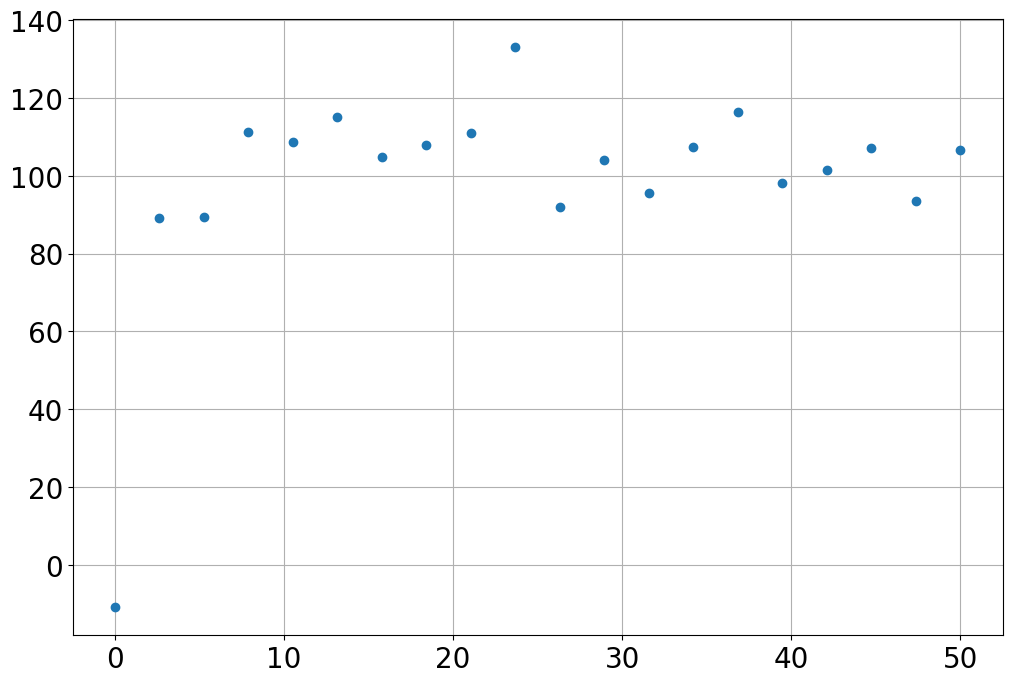

In [ ]:
t=array(data['t'])
y=array(data['y'])
plot(t,y,'o')

In [ ]:
def f(x,a=1,b=1,c=1,d=1):
    return a/(1+exp(-c*(x-d)))+b

[<matplotlib.lines.Line2D>]

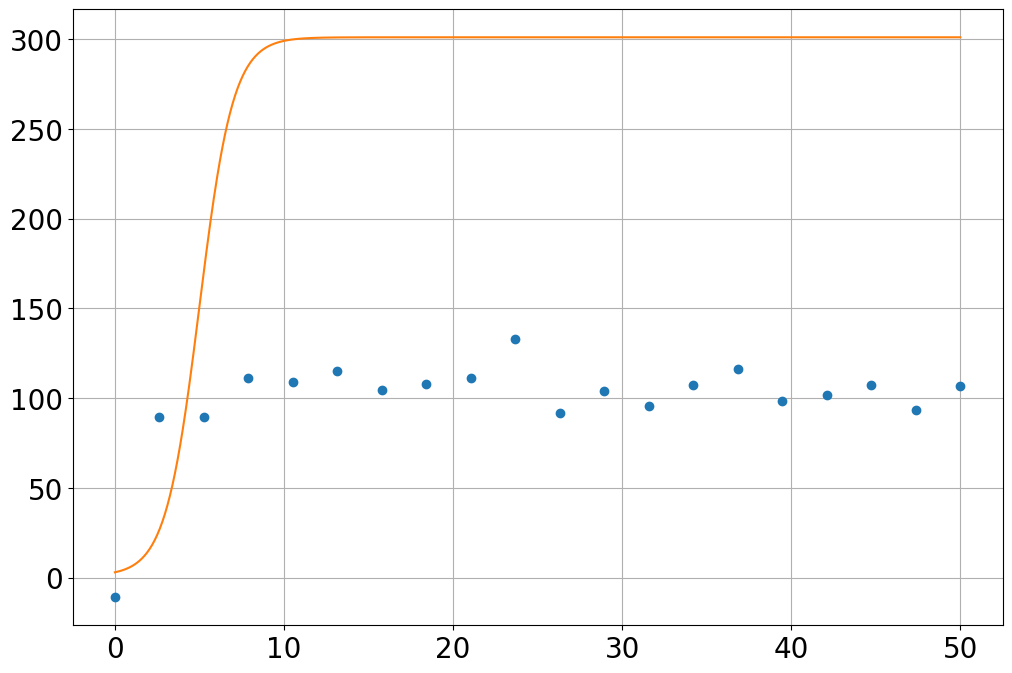

In [ ]:
xx=linspace(0,50,1000)
yy=f(xx,a=300,b=1,c=1,d=5)

plot(t,y,'o')
plot(xx,yy,'-')

In [ ]:
model=Model(f)
params=model.make_params()
params['a']=Parameter("a",min=0,max=1000,value=200)
params['b']=Parameter("b",min=0,max=1000,value=10)
params['c']=Parameter("c",min=0,max=5,value=1)
params['d']=Parameter("d",min=-1000,max=1000,value=1)
results=model.fit(y,params,x=t)
results

[<matplotlib.lines.Line2D>]

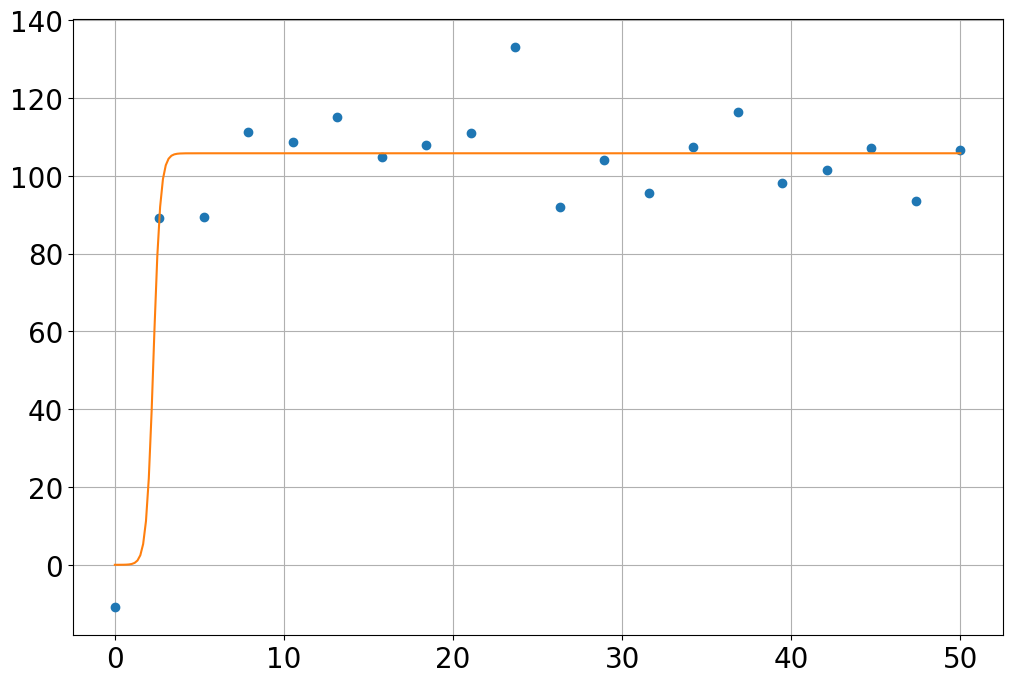

In [ ]:
plot(t,y,'o')

tt=linspace(0,50,300)
yy=results.eval(x=tt)
plot(tt,yy,'-')

In [ ]:
def fit_logistic(filename,display=False):
    data=pd.read_csv(filename)
    t=data['t']
    y=data['y']
    model=Model(f)   # from lmfit
    params=model.make_params()
    params['a']=Parameter("a",min=0,max=1000,value=max(y))
    params['b']=Parameter("b",min=0,max=1000,value=1)
    params['c']=Parameter("c",min=0,max=5,value=1)
    params['d']=Parameter("d",min=-1000,max=1000,value=1)

    result = model.fit(y, params, x=t)
    
    
    if display:
        plot(t,y,'o')
        tt=linspace(0,50,300)
        yy=result.eval(x=tt)
        plot(tt,yy,'-')     
        
    return result

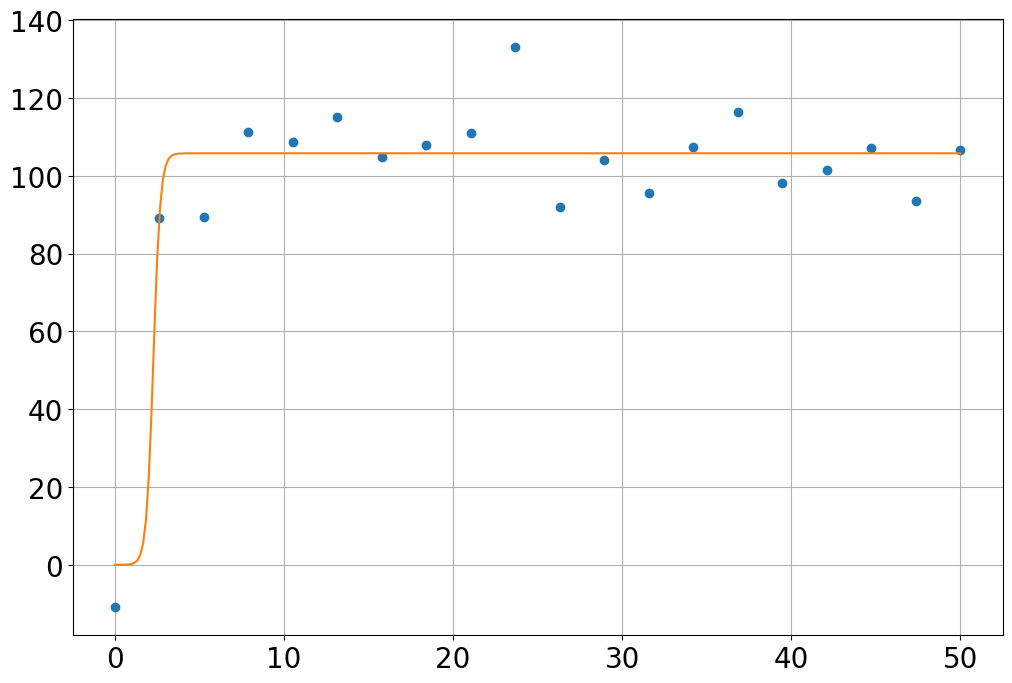

In [ ]:
fit_logistic('data/logistic_sample_data/logistic_sample_data_3.csv',display=True)

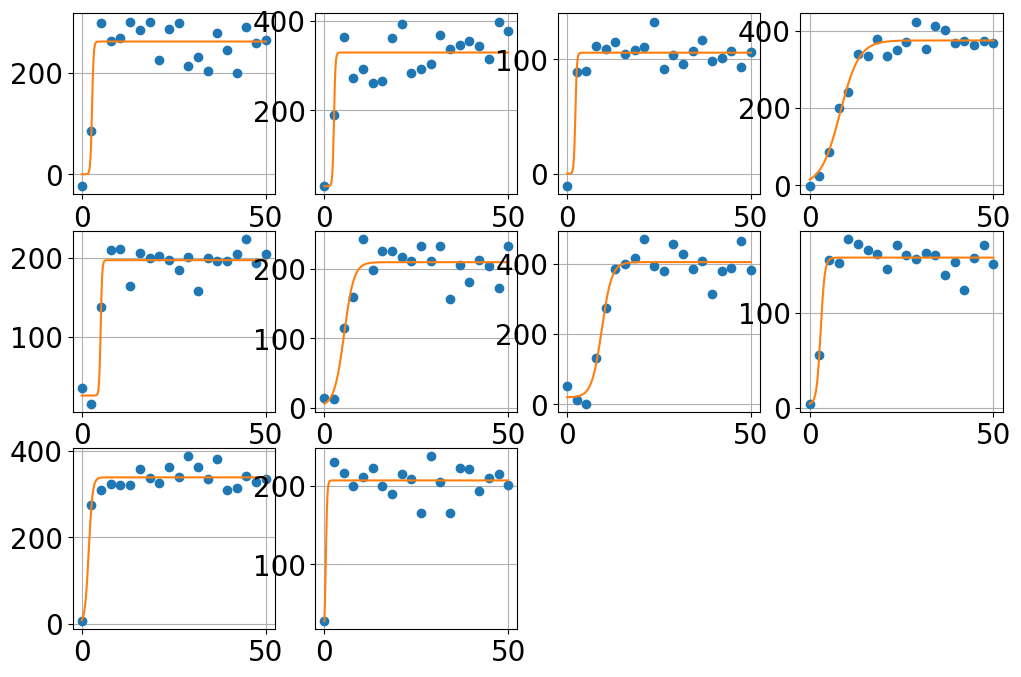

In [ ]:
filenames=glob('data/logistic_sample_data/log*.csv')
count=1
for name in filenames[:12]:
    subplot(3,4,count)
    fit_logistic(name,True)
    count=count+1

## World Population

In [ ]:
data=pd.read_excel('data/Appendix_ World Population Estimate Sets.xlsx',skiprows=2)
data.head()

,Year,Leage of Nations,Unnamed: 2,Taeuber 1949,16,Cook 1960,17,Durand 1967,18,Clark 1968,...,Trager 1994,23,Livi-Bacci\n2001,24,UN Pop\nDivision 2006,25,U.S. Census\nBureau 2007,26,Time,population
0,"10,000 B.C.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6000000.0,NaN,NaN,NaN,NaN,NaN,-10000.0,5000000.0
1,"8,000 B.C.",NaN,NaN,NaN,NaN,NaN,NaN,5000000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8000.0,5000000.0
2,"5,000 B.C.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5000.0,5000000.0
3,"4,000 B.C.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4000.0,7000000.0
4,"3,000 B.C.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3000.0,14000000.0


[<matplotlib.lines.Line2D>]

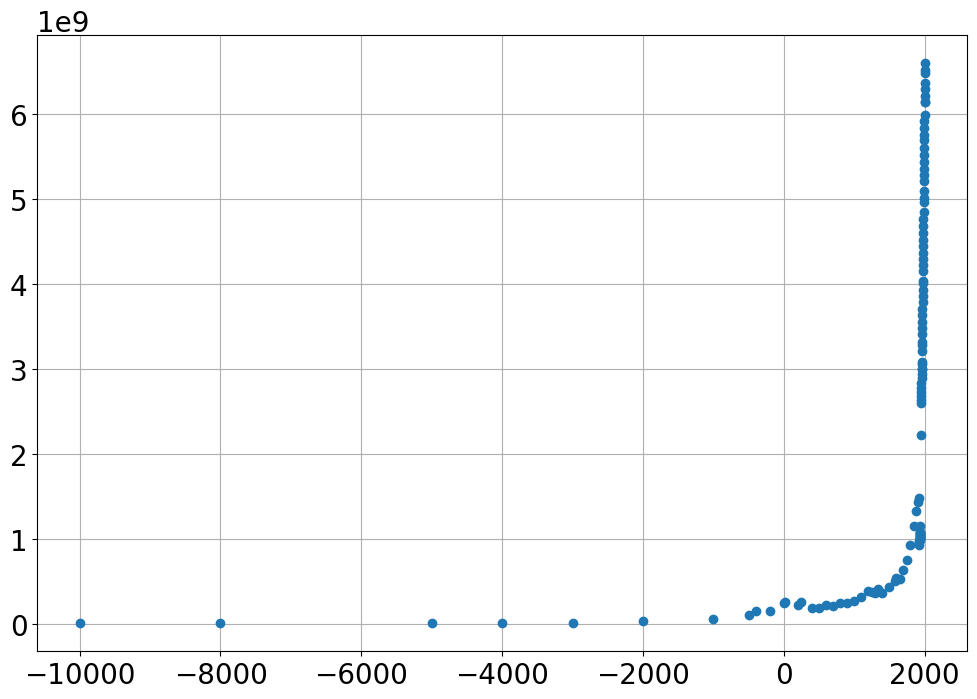

In [ ]:
t=data['Time']
y=data['population']
plot(t,y,'o')

[<matplotlib.lines.Line2D>]

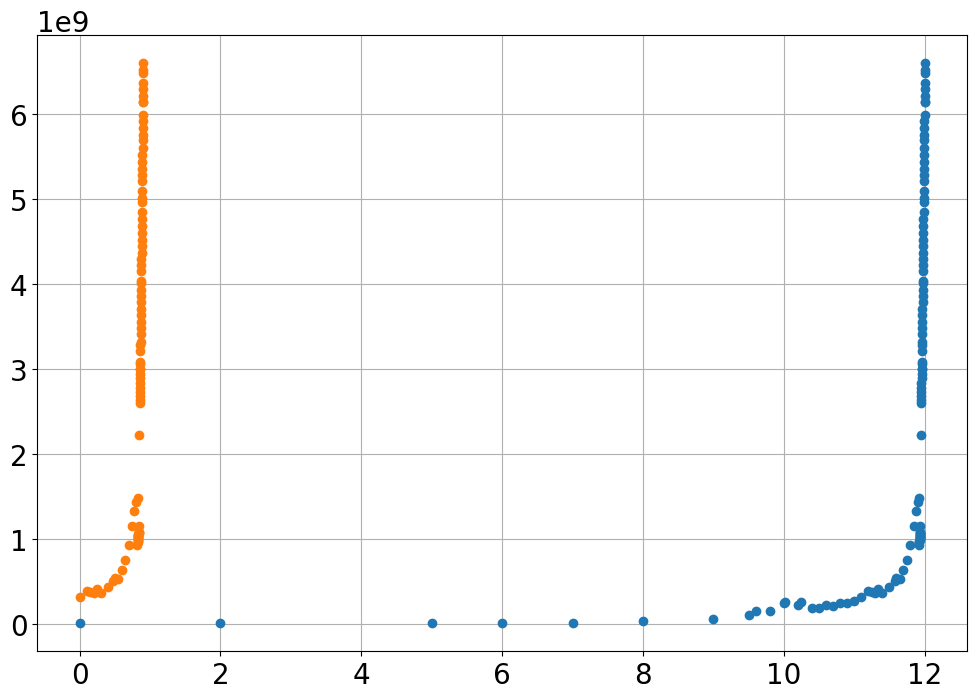

In [ ]:
t=(data['Time'].dropna()-(-10000))/1000
y=data['population'].dropna()

plot(t,y,'o')

y=array(y[t>11])
t=array(t[t>11])
t=t-min(t)
plot(t,y,'o')

[<matplotlib.lines.Line2D>]

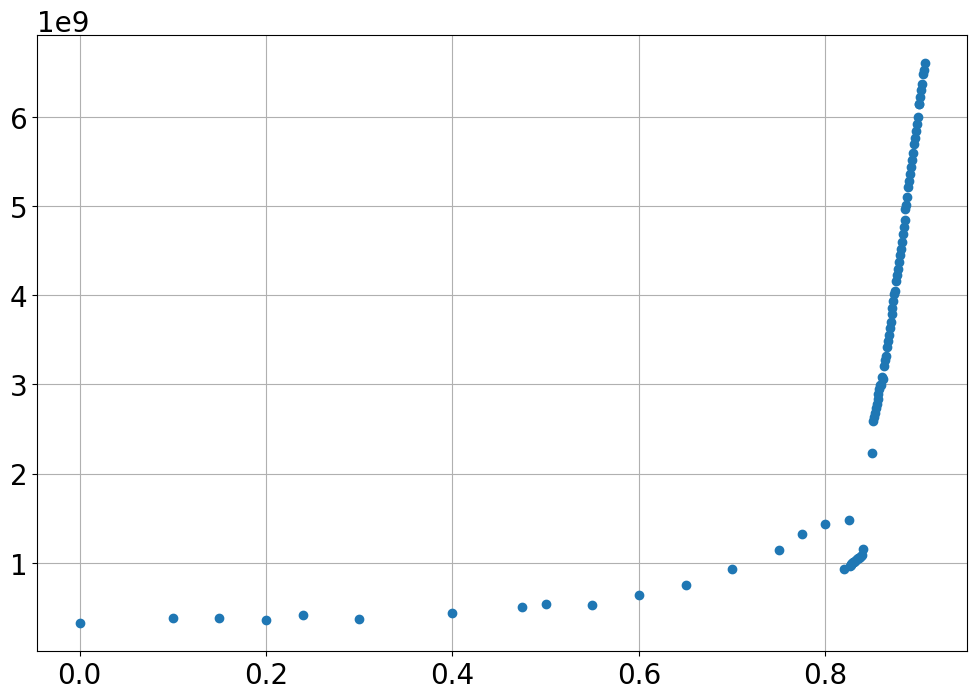

In [ ]:
plot(t,y,'o')

$$
N=N_1 \left(\frac{t_o-t_1}{t_0-t}  \right)^k
$$

In [ ]:
def N(x,k,to,N1,t1):
    return N1*((to-t1)/(to-x))**k

In [ ]:
model=Model(N)
params=model.make_params()
params

name,value,initial value,min,max,vary
k,-inf,None,-inf,inf,True
to,-inf,None,-inf,inf,True
N1,-inf,None,-inf,inf,True
t1,-inf,None,-inf,inf,True


In [ ]:
params['to']=Parameter("to",min=max(t)+1e-4,max=1000,value=max(t)+50)
params['k']=Parameter("k",min=0,max=20,value=.1)
params['N1']=Parameter("N1",value=y[0],vary=False)
params['t1']=Parameter("t1",value=t[0],vary=False)
params

name,value,initial value,min,max,vary
k,0.10000000,0.1,0.00000000,20.0000000,True
to,50.9070000,50.907,0.90710000,1000.00000,True
N1,3.2000e+08,320000000.0,-inf,inf,False
t1,0.00000000,0.0,-inf,inf,False


In [ ]:
result = model.fit(y, params, x=t)
result

/Users/bblais/.local/lib/python3.11/site-packages/lmfit/printfuncs.py:393: RuntimeWarning: invalid value encountered in scalar divide
  spercent = f'({abs(par.stderr/par.value):.2%})'


[<matplotlib.lines.Line2D>]

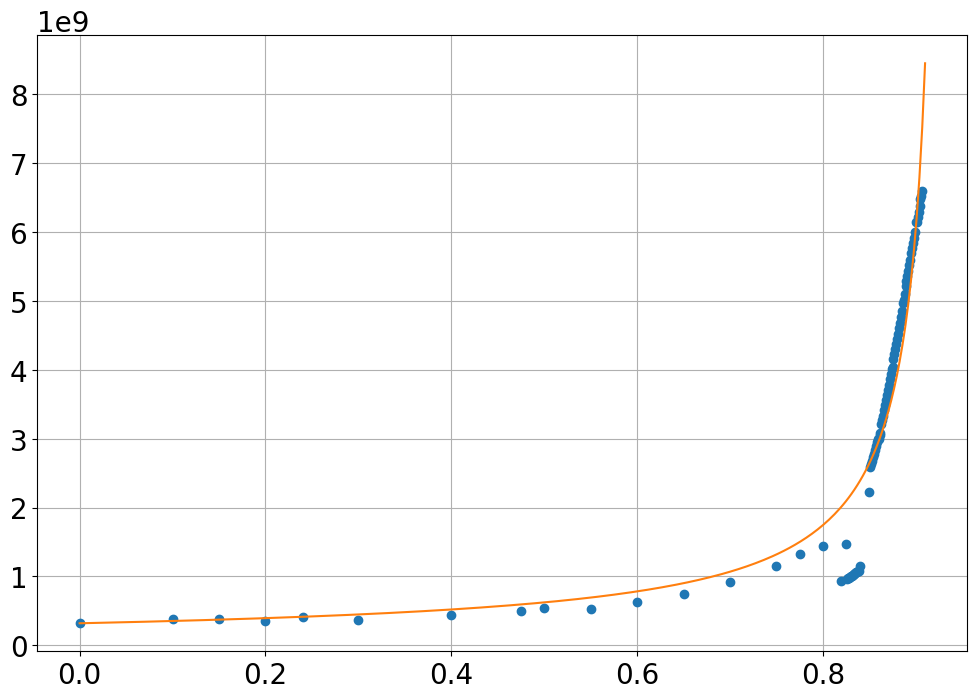

In [ ]:
plot(t,y,'o')
tt=linspace(0,0.91,300)
yy=result.eval(x=tt)
plot(tt,yy,'-')  